In [1]:
#pip install nltk

In [2]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
import pandas as pd
import seaborn as sb
import nltk
import nltk.tokenize 
from nltk.tokenize import word_tokenize
from nltk.util import ngrams
nltk.download('punkt')
nltk.download('stopwords')
from nltk.corpus import stopwords
stopwords.words('english')
from collections import Counter

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\simplon\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\simplon\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [3]:
# function that prints a word cloud from a csv file
def word_clouds(csv_name, custom_sw):
    #load csv into a dataframe
    df = pd.read_csv(csv_name, usecols = ['tweets'])
    # creating the worldcloud with exception words
    stopwords = list(set(STOPWORDS))
    new_stopwords = stopwords + custom_sw
    wordcloud = WordCloud(background_color = 'white', stopwords = new_stopwords, max_words = 50).generate(' '.join(df['tweets']))
    # printing the word cloud
    plt.figure(figsize = (10,10))
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.title(csv_name)
    plt.show()
    return df

In [4]:
# creating stop words for each book
song_of_achilles_sw = ['achilles', 'song', 'read', 'book', 'reading', 'madeline', 'miller', 'im']
art_of_war_sw = ['art', 'war', 'sun', 'tzu', 'amp', 'book', 'books', 'know', 'enemy', 'read', 'one']
book_thief_sw = ['book', 'thief', 'markus', 'zusak', 'thiefgt']
picture_of_dorian_gray_sw = ['dorian', 'gray', 'picture', 'book', 'oscar', 'wilde', 'read', 'reading', 'books','im', 'one']

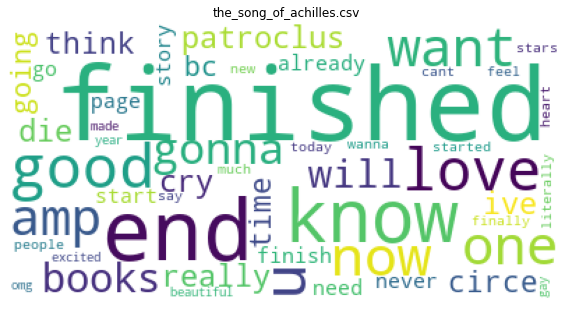

In [16]:
# executing the wordcloud function for each book
song_of_achilles_df = word_clouds('the_song_of_achilles.csv', song_of_achilles_sw)

### We can see 'finished', 'love', 'good', which are positive outcomes.
### 'patroclus', 'circe' and 'bc' shows that the book talks antiquity

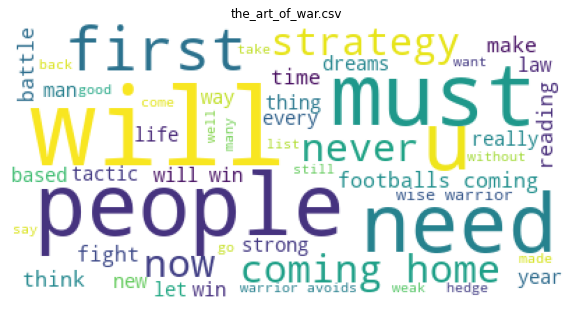

In [13]:
art_of_war_df = word_clouds('the_art_of_war.csv', art_of_war_sw)

### 'must', 'need', 'good' shows it's a recommended book
### 'strategy', 'battle', 'fight' shows that we it's a book about war and could correspond to leading personalities

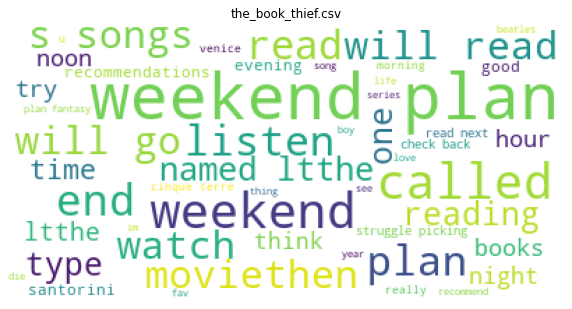

In [14]:
book_thief_df = word_clouds('the_book_thief.csv', book_thief_sw)

### 'weekend plan', 'will read', 'recommendations', 'recommend' shows that the book is also recommended

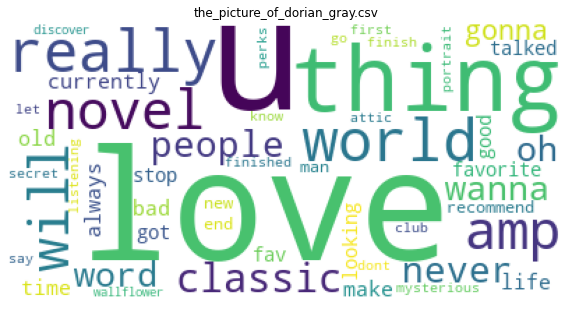

In [15]:
picture_of_dorian_gray_df = word_clouds('the_picture_of_dorian_gray.csv', picture_of_dorian_gray_sw)

### 'love', 'classic' are a clear indicator of the quality of the book
### 'love' can also means romantic persons might like this book

In [6]:
# function that prints bigrams and trigrams of tweets
def ngrams_books(df, book_sw):
    # convert dataframe into string 
    tweet_text = ''.join(df['tweets'])
    # removing stopwords from text
    for word in book_sw:
        tweet_text = tweet_text.replace(word, '')
    
    token = nltk.word_tokenize(tweet_text)
    filtered = [word for word in token if word not in stopwords.words('english')]
    # creating a list of bigrams and trigrams
    bigrams = list(ngrams(filtered,2))
    trigrams = list(ngrams(filtered,3))
    # count of bigrams and trigrams
    a = Counter(bigrams)
    b = Counter(trigrams) 
    # dictionnary into dataframe
    df_bigram = pd.DataFrame.from_records(a.most_common(30), columns=['bigram','count'])
    df_trigram = pd.DataFrame.from_records(b.most_common(30), columns=['trigram','count'])
    # printing bigram
    plt.figure(figsize=(35,20))
    plt.xlabel("Occurency")
    plt.ylabel("Words_bigram")
    sb.barplot(x=df_bigram['count'], y=df_bigram['bigram'])
    # printing trigram
    plt.figure(figsize=(35,20))
    plt.xlabel("Occurency")
    plt.ylabel("Words_bigram")
    sb.barplot(x=df_trigram['count'], y=df_trigram['trigram'])

## The Song of Achilles

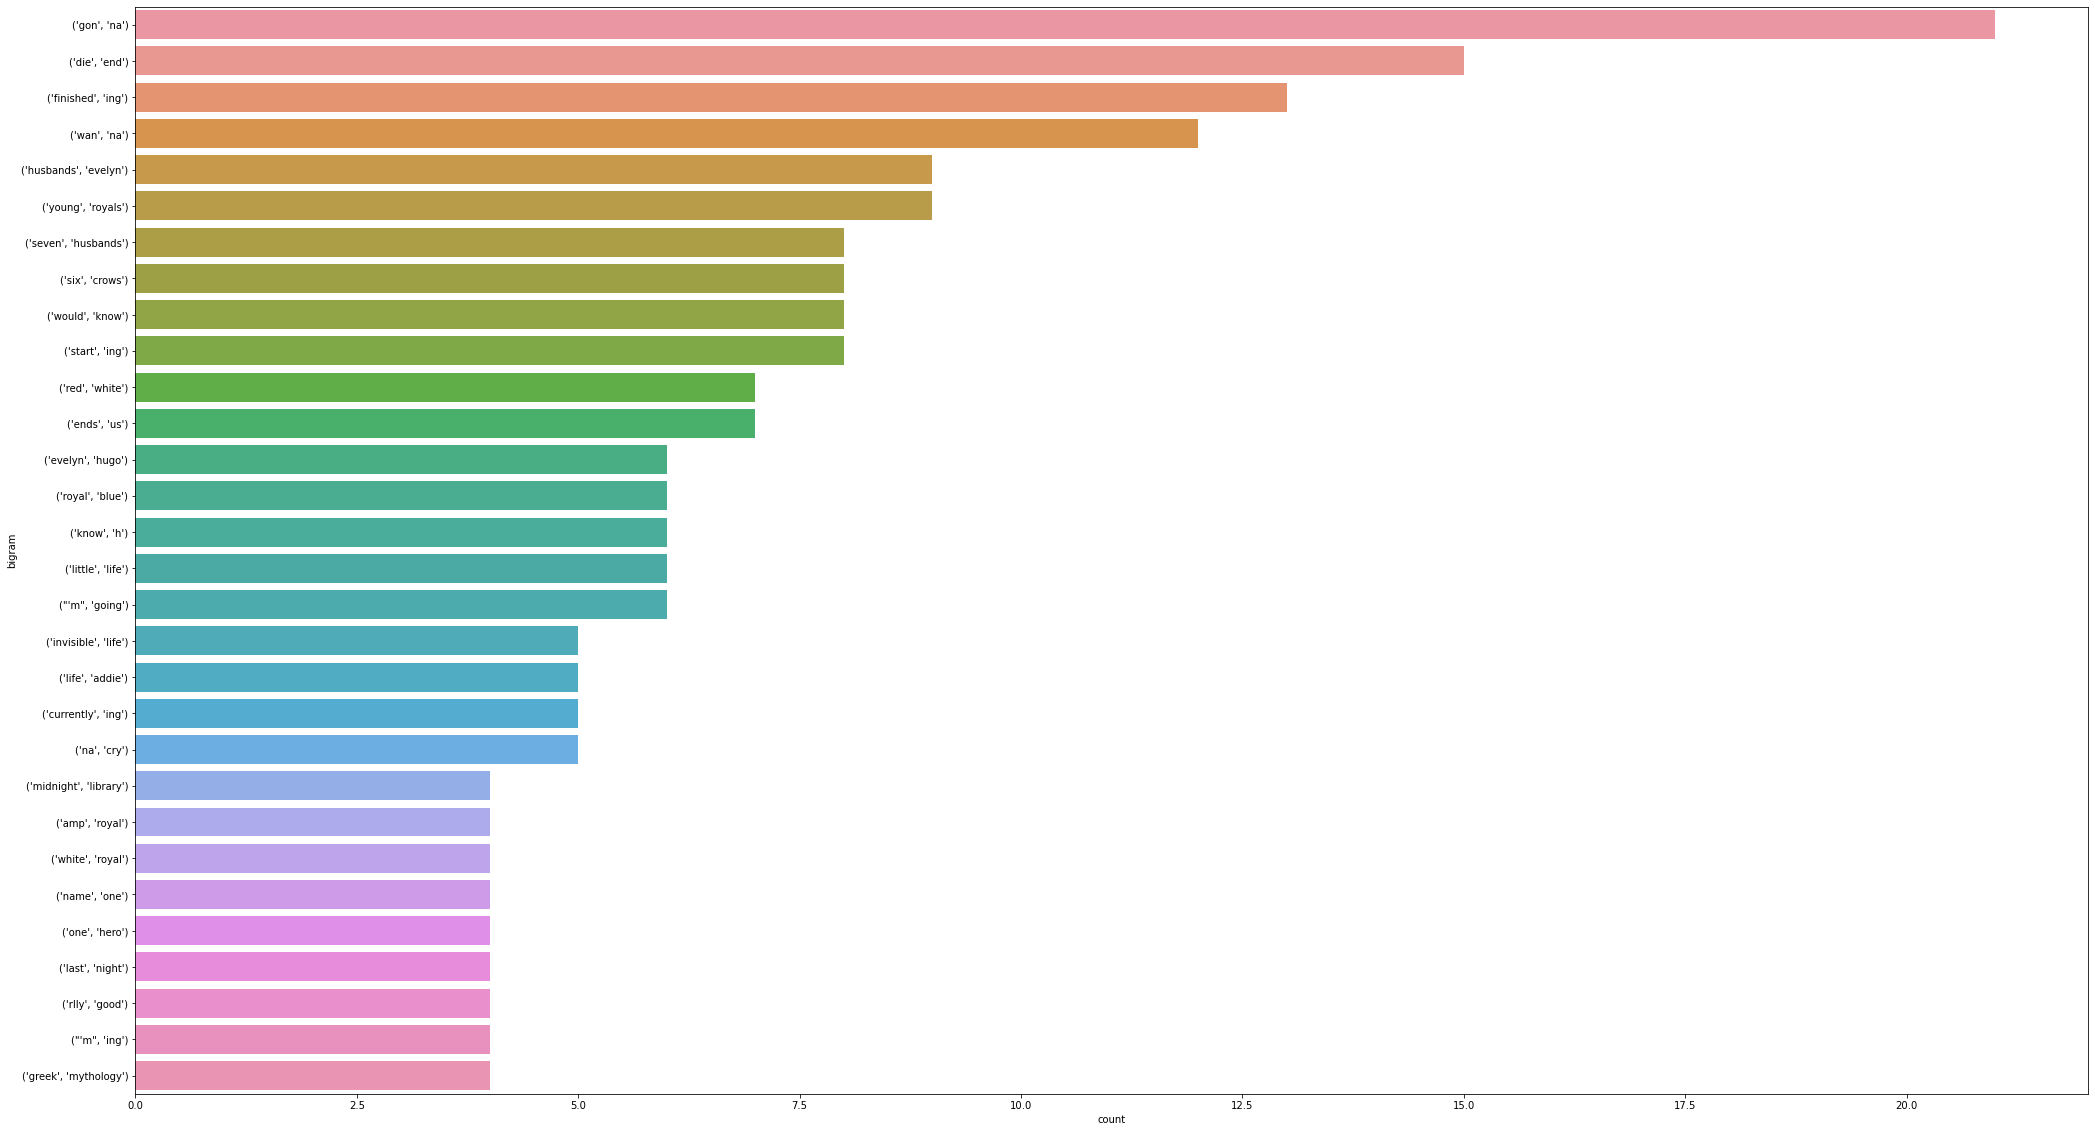

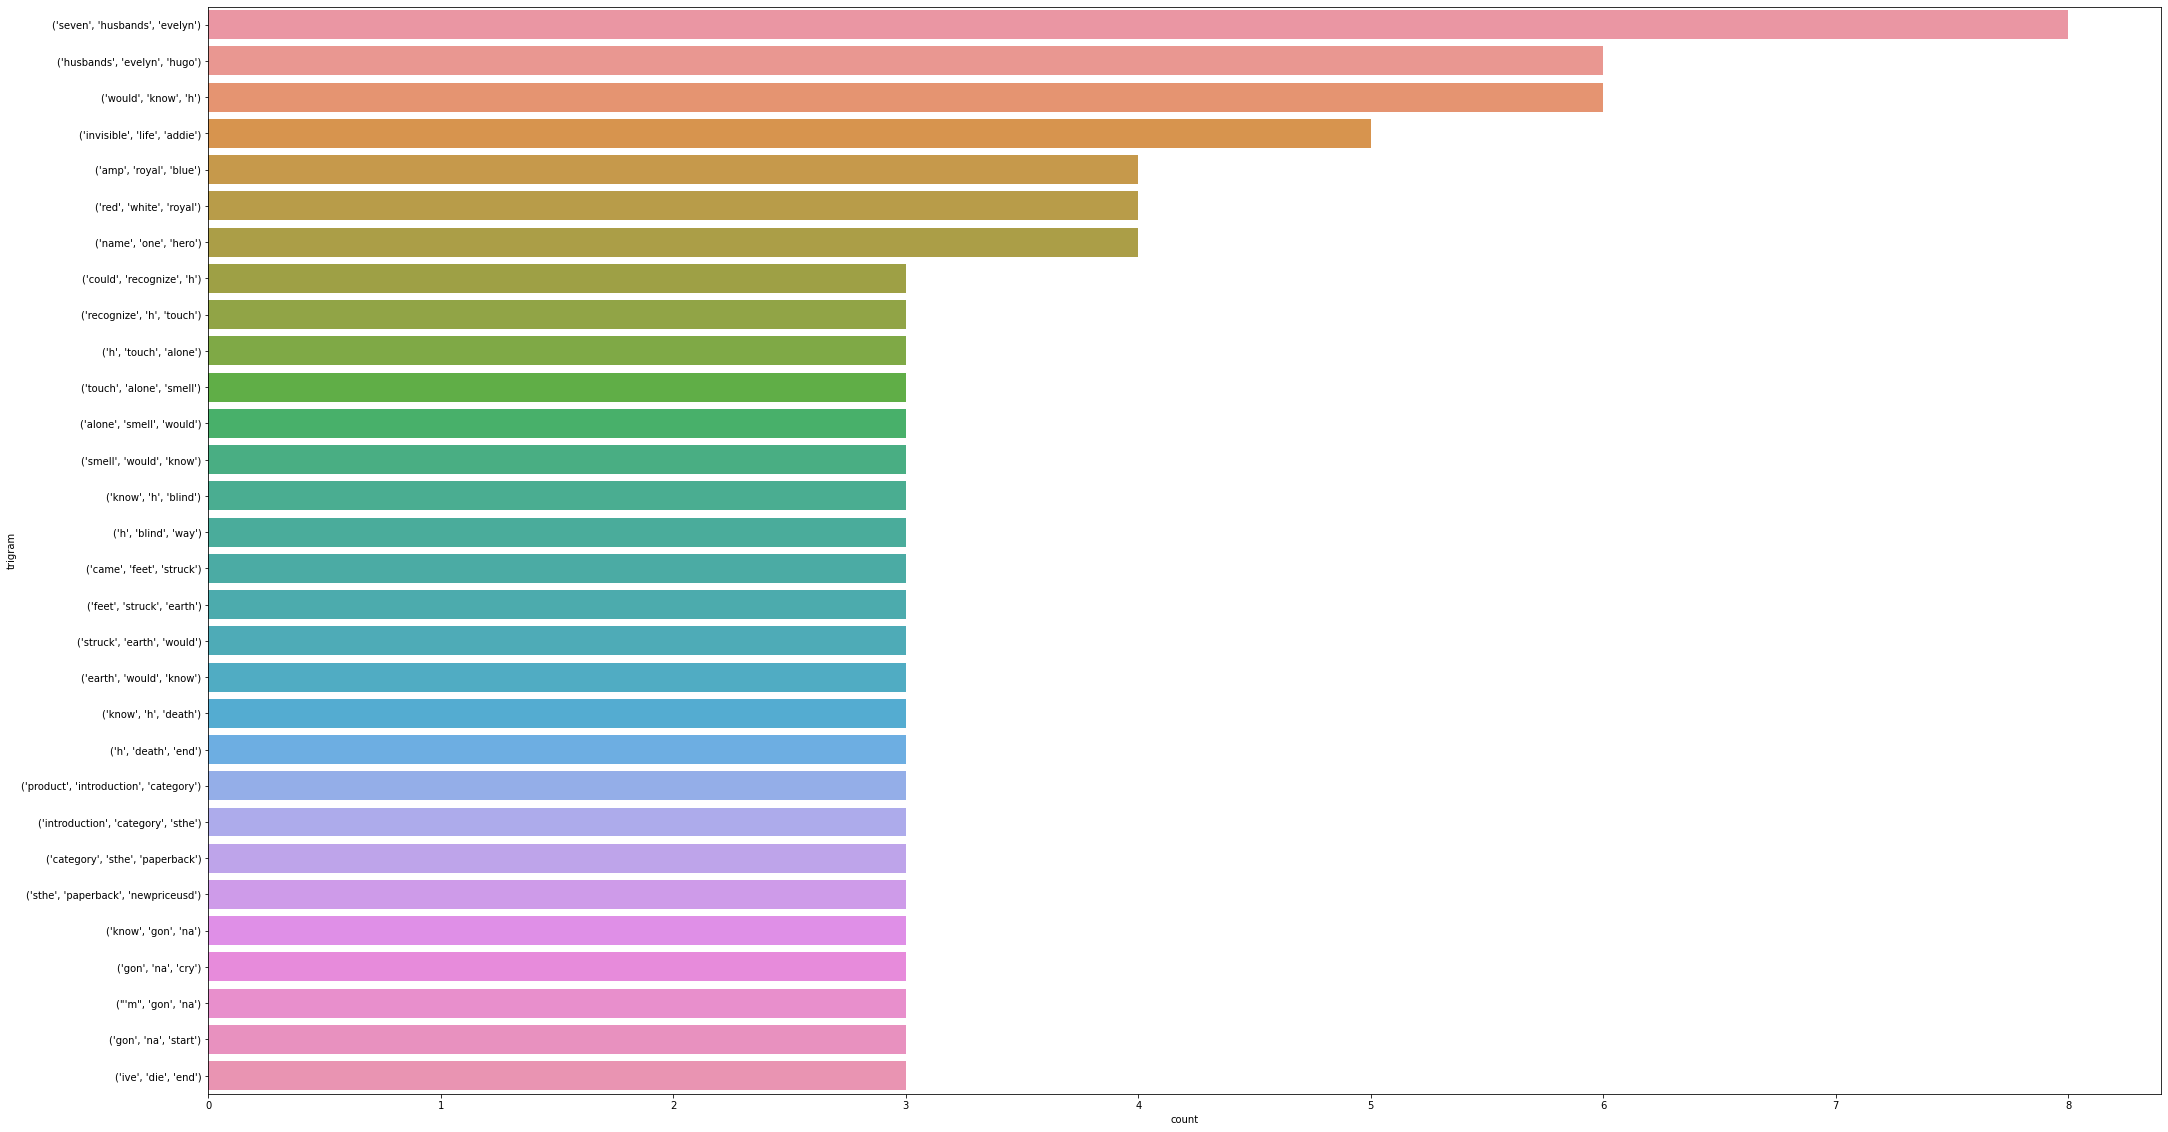

In [7]:
ngrams_books(song_of_achilles_df, song_of_achilles_sw)

## The Art of War

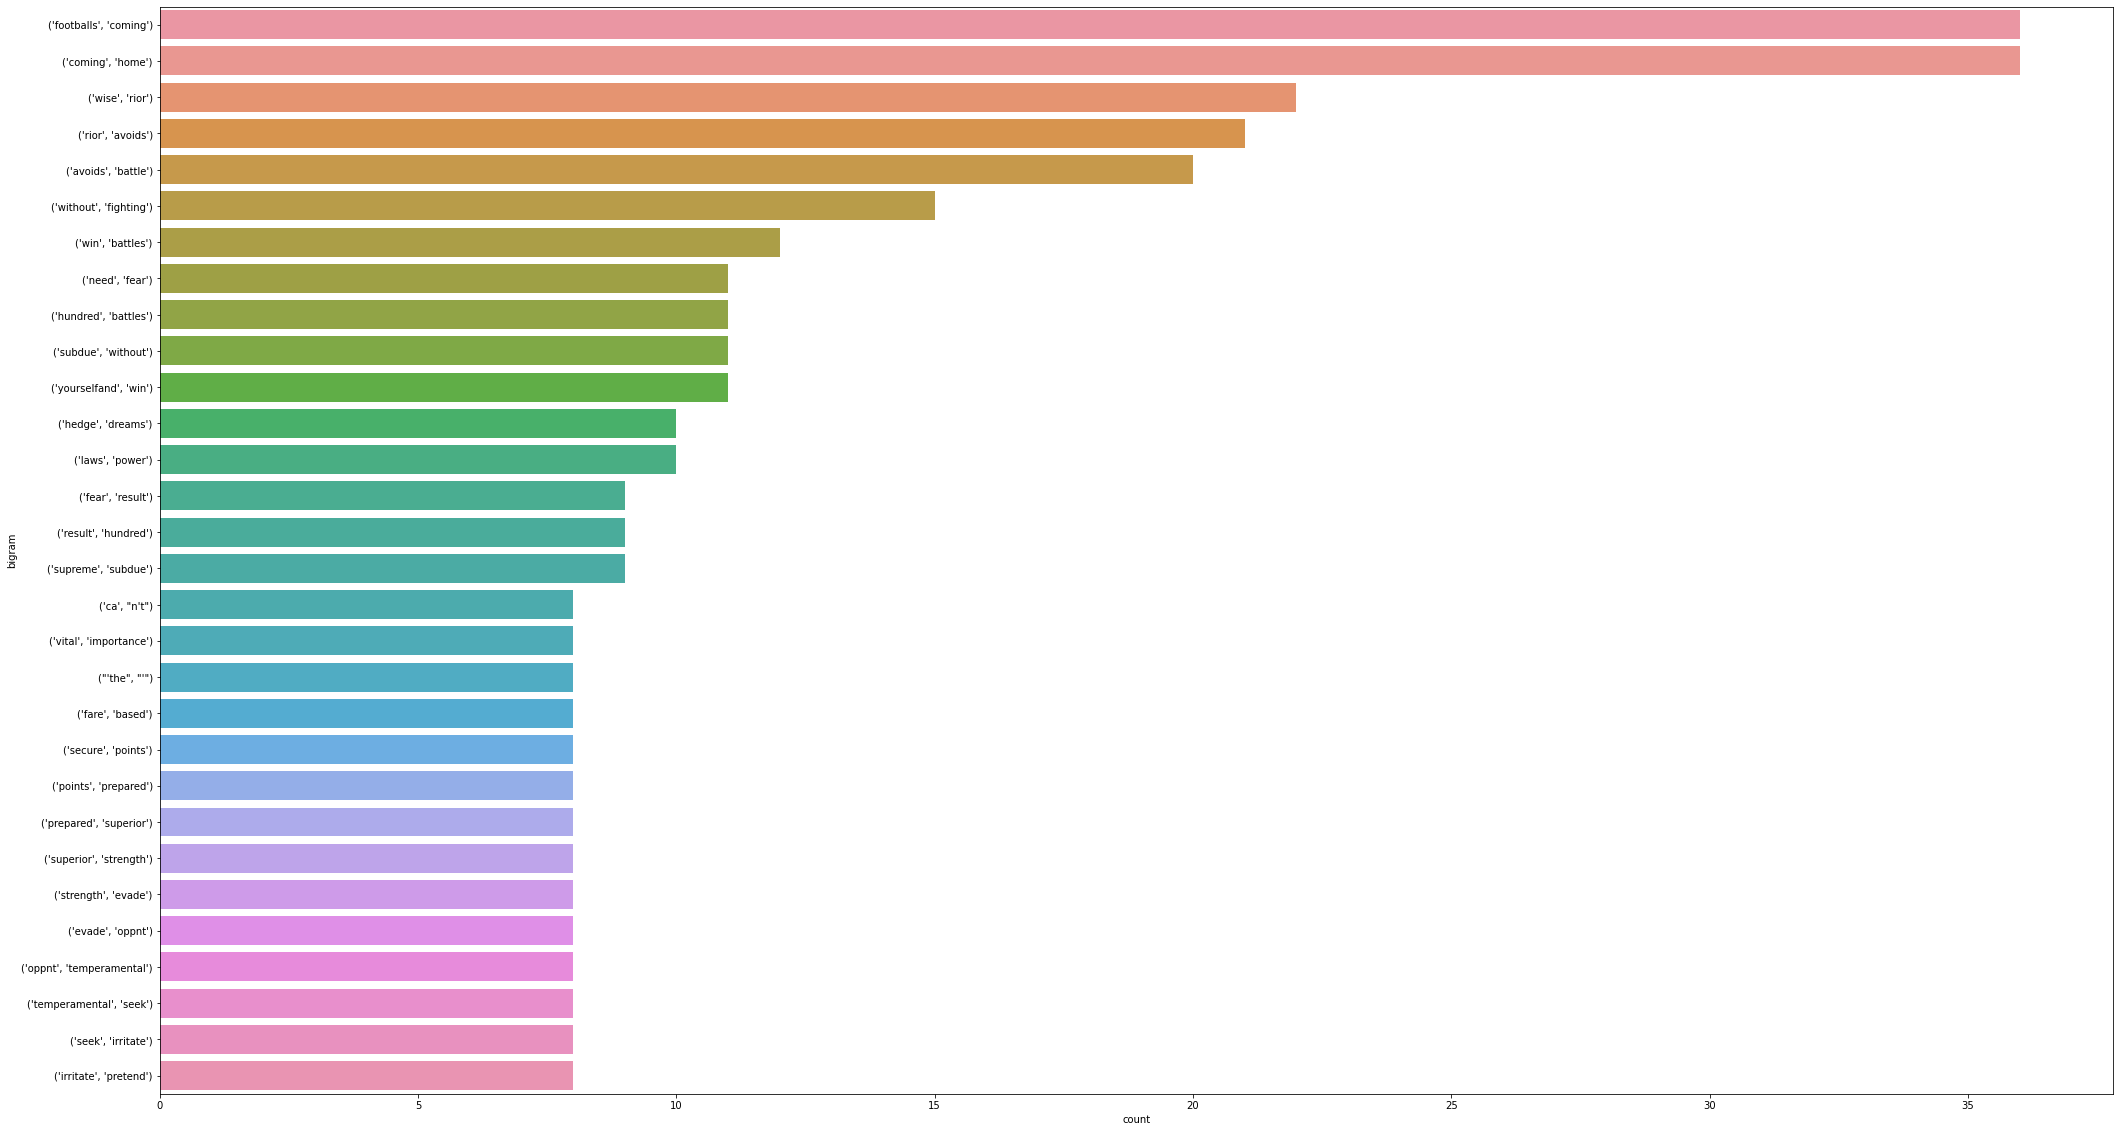

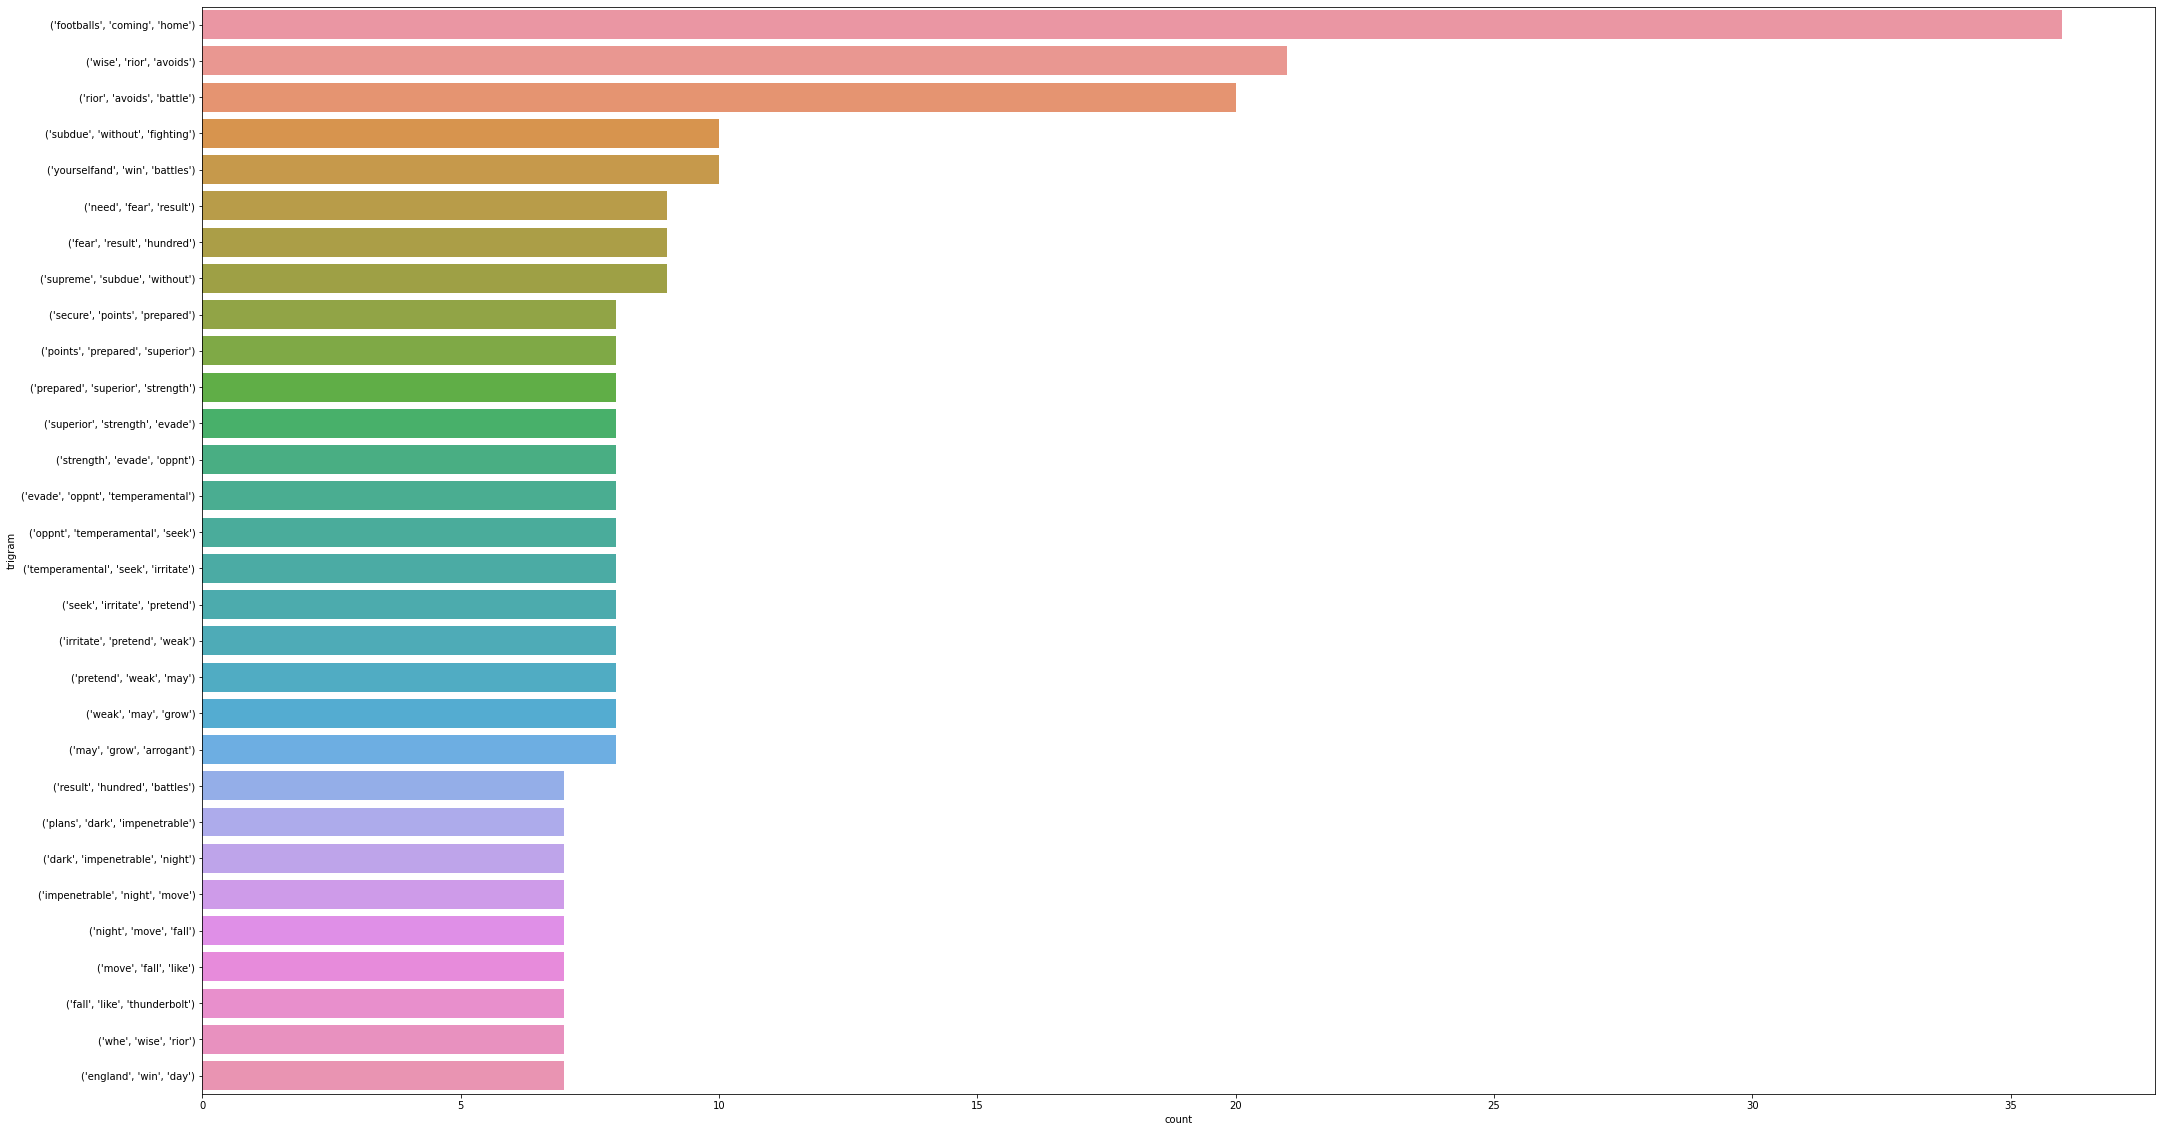

In [8]:
ngrams_books(art_of_war_df, art_of_war_sw)

## The Book Thief

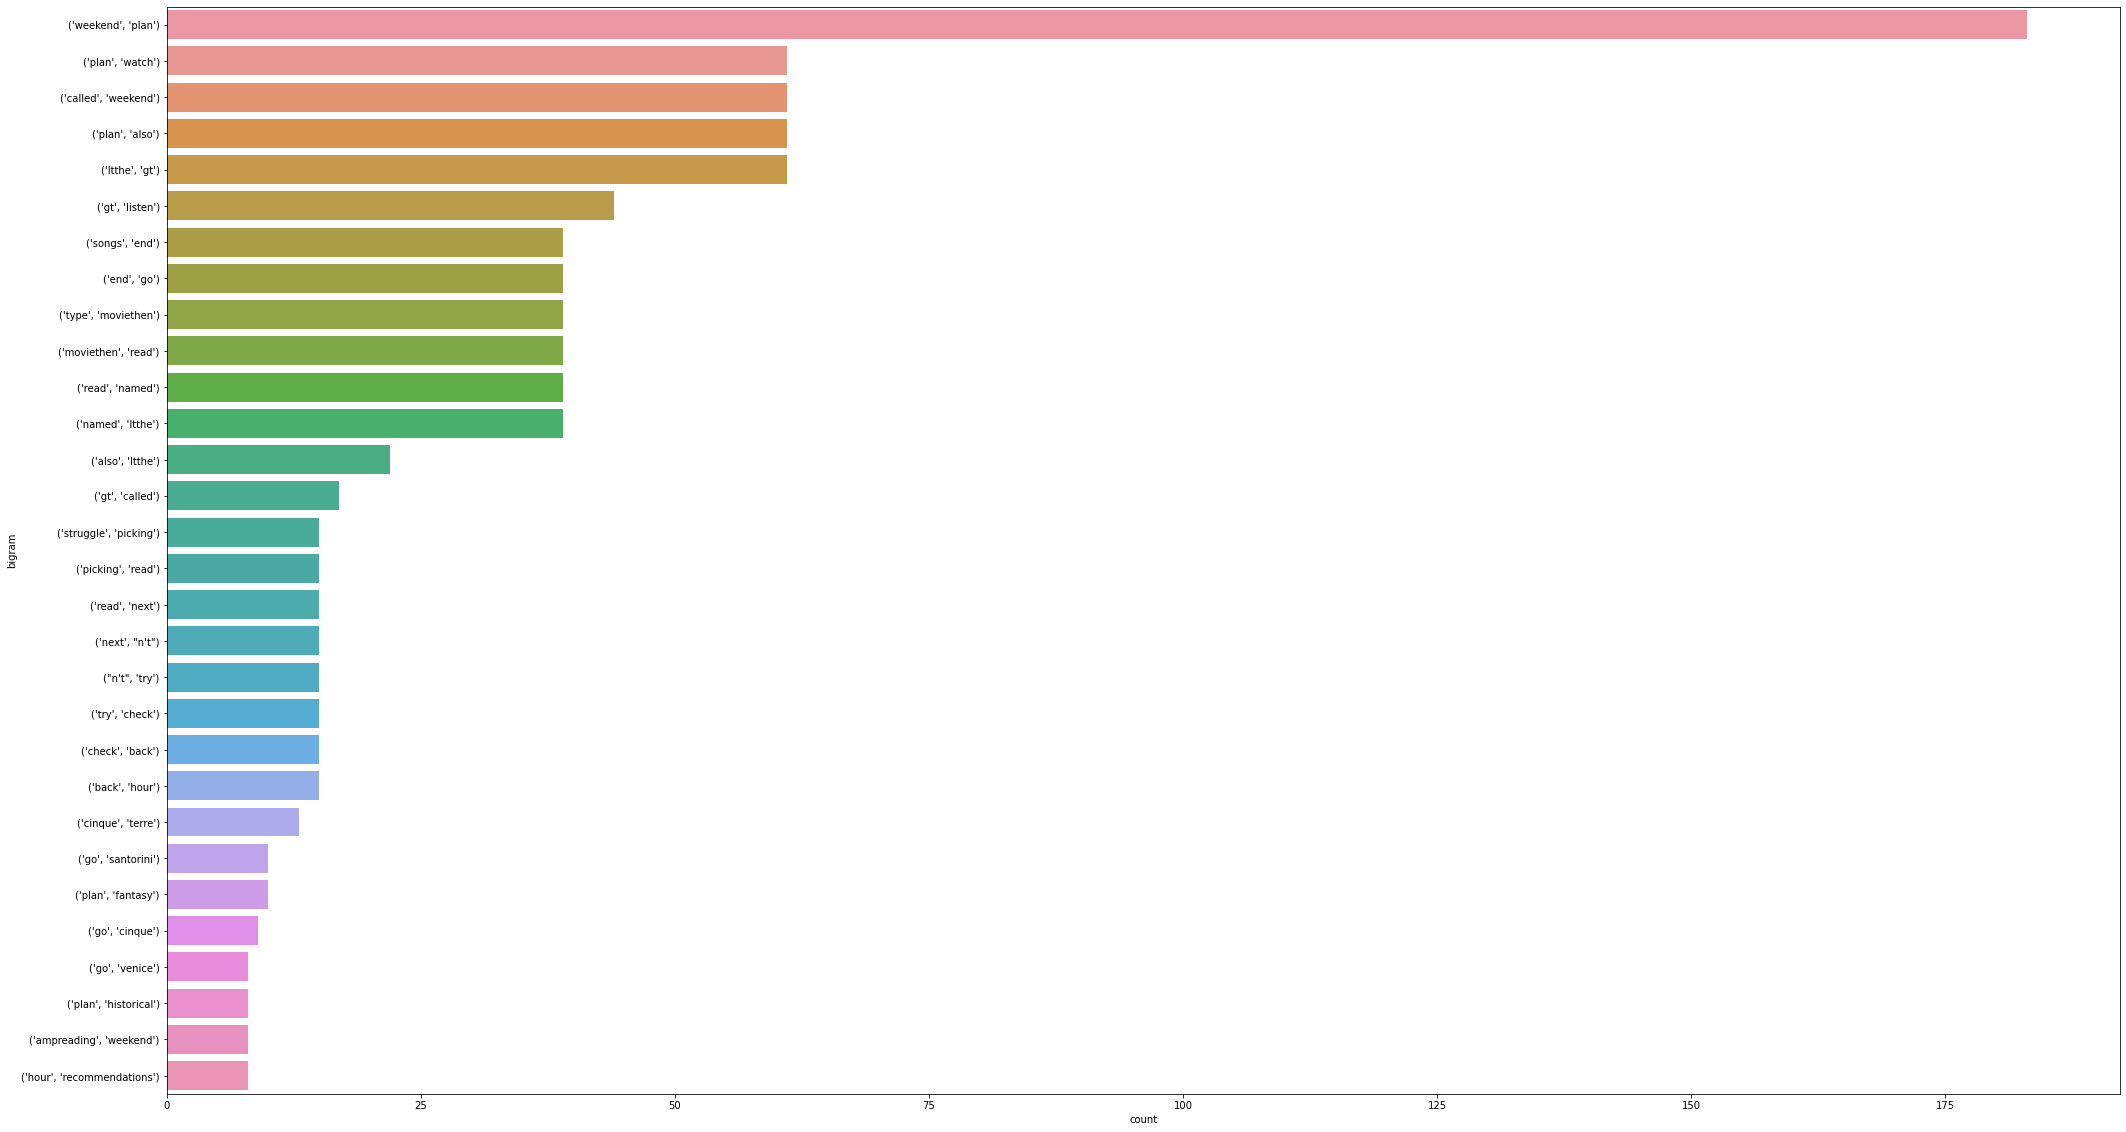

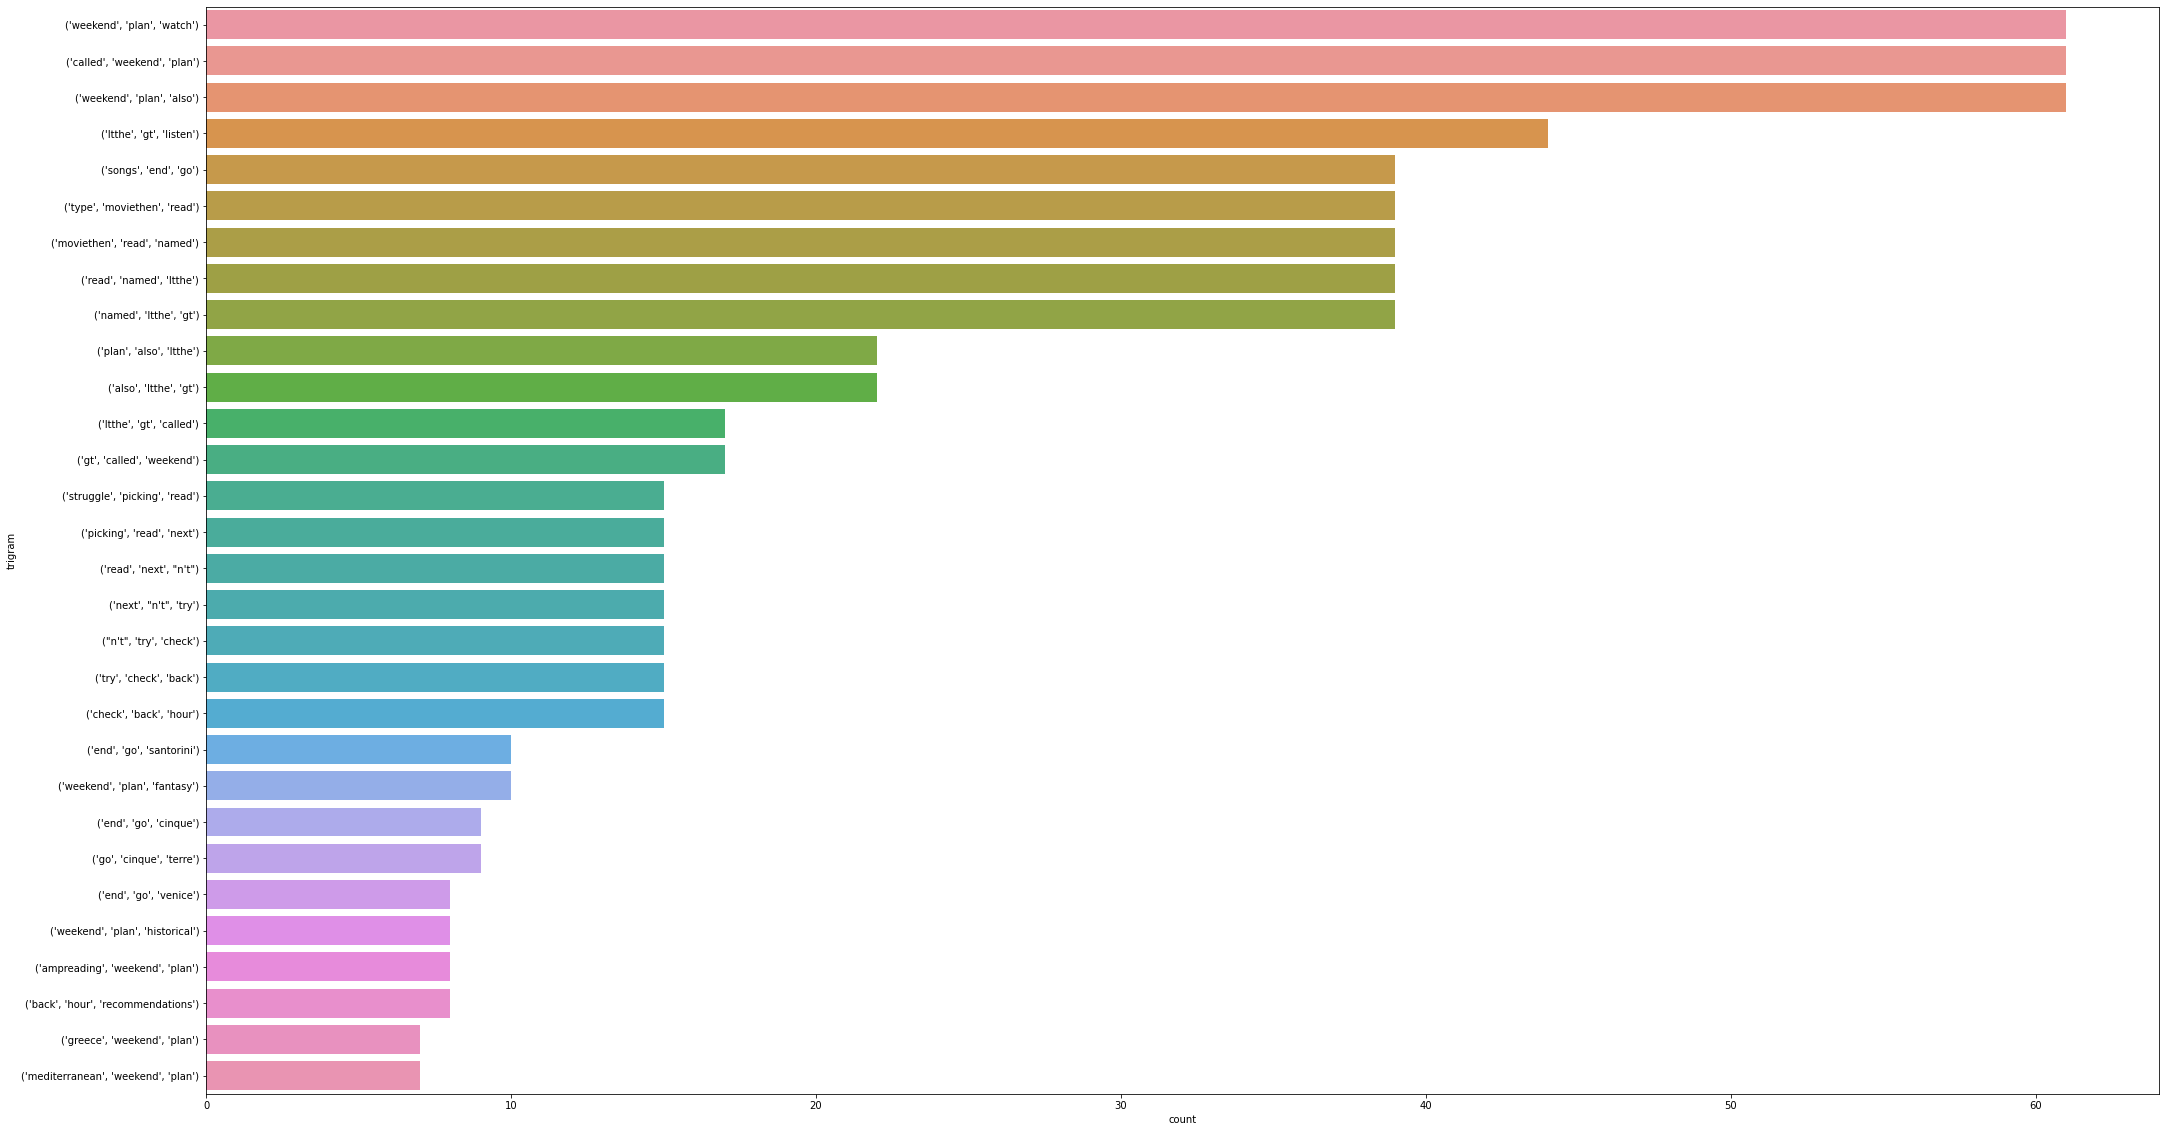

In [9]:
ngrams_books(book_thief_df, book_thief_sw)

## The Picture of Dorian Gray

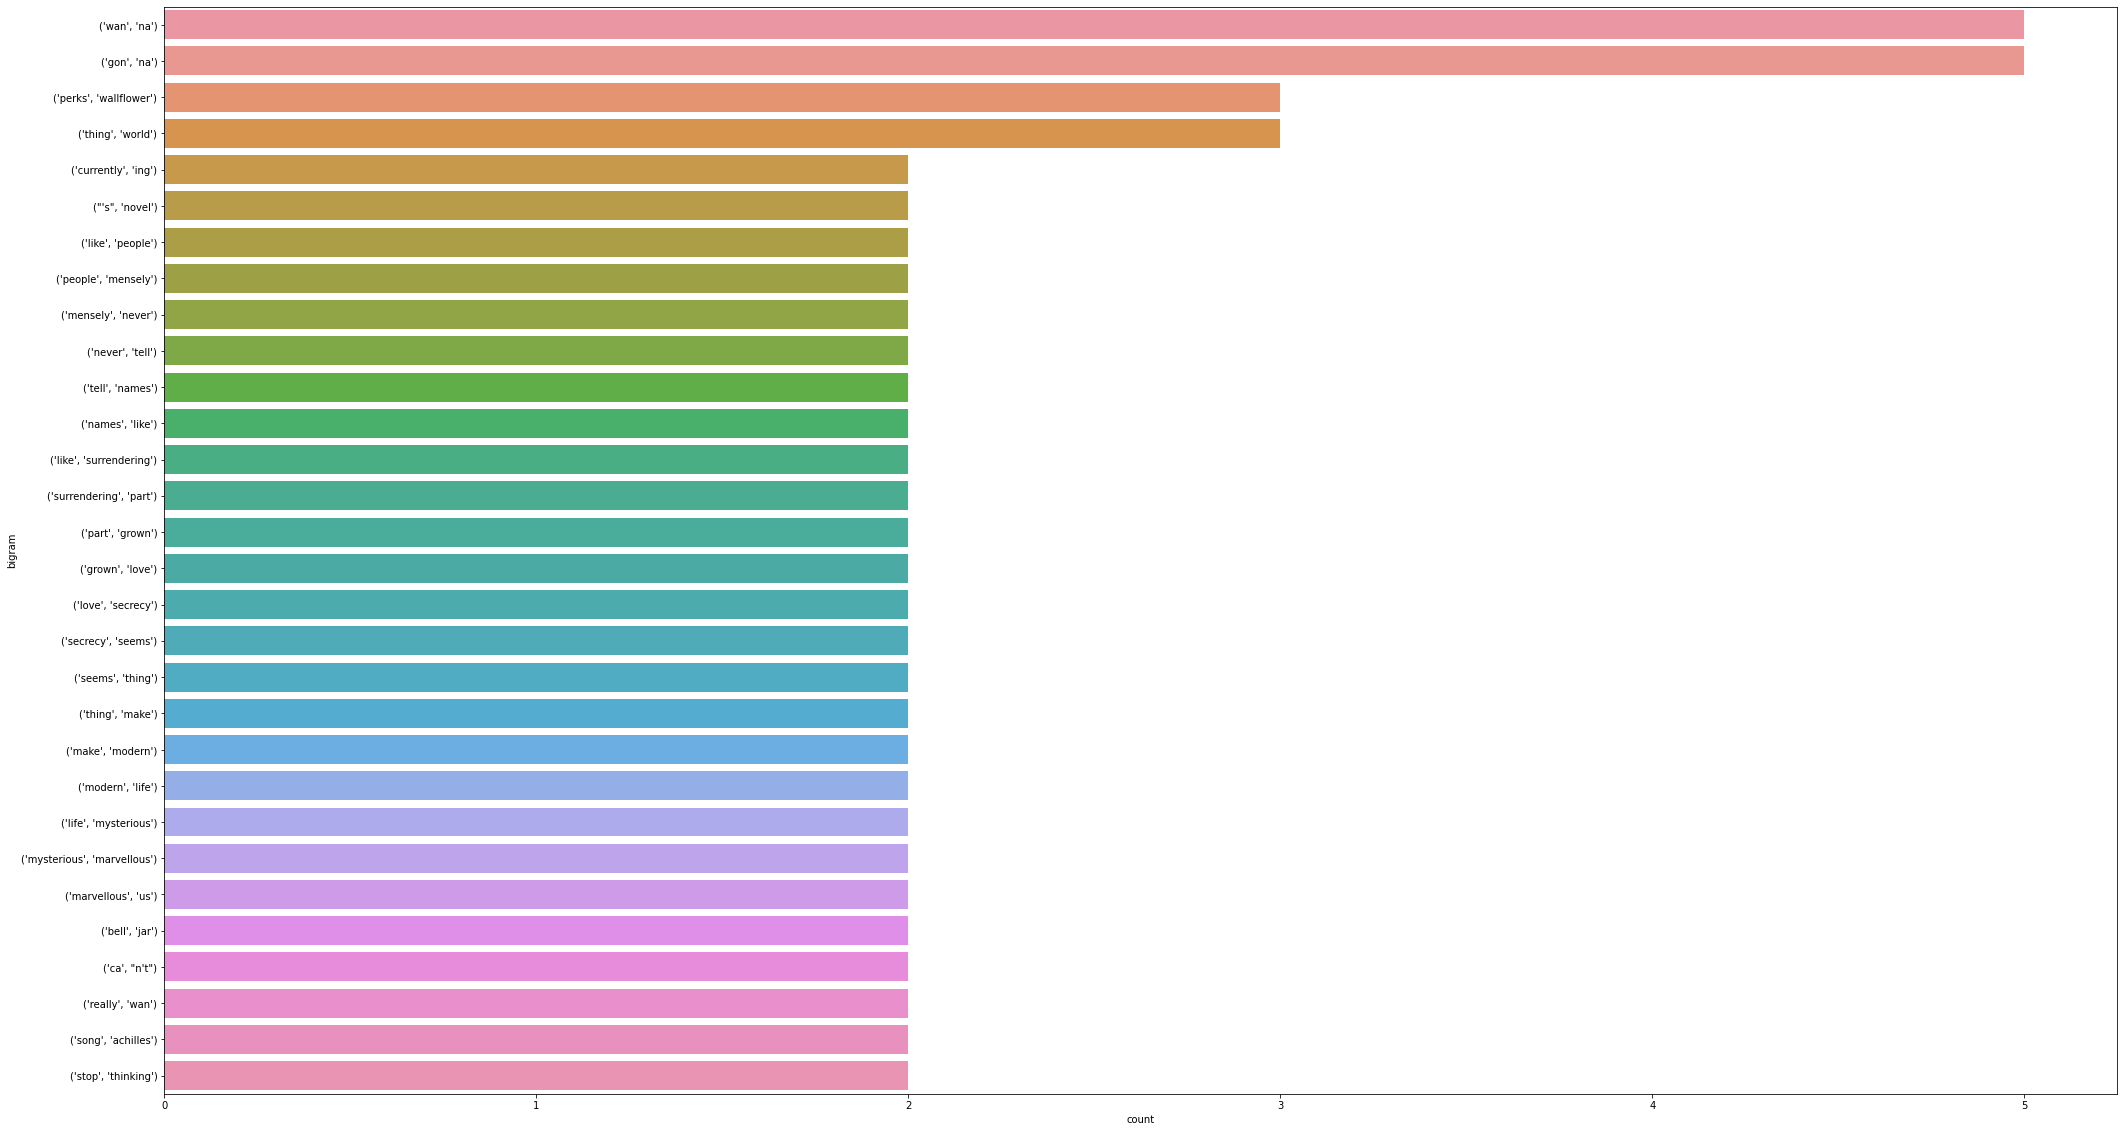

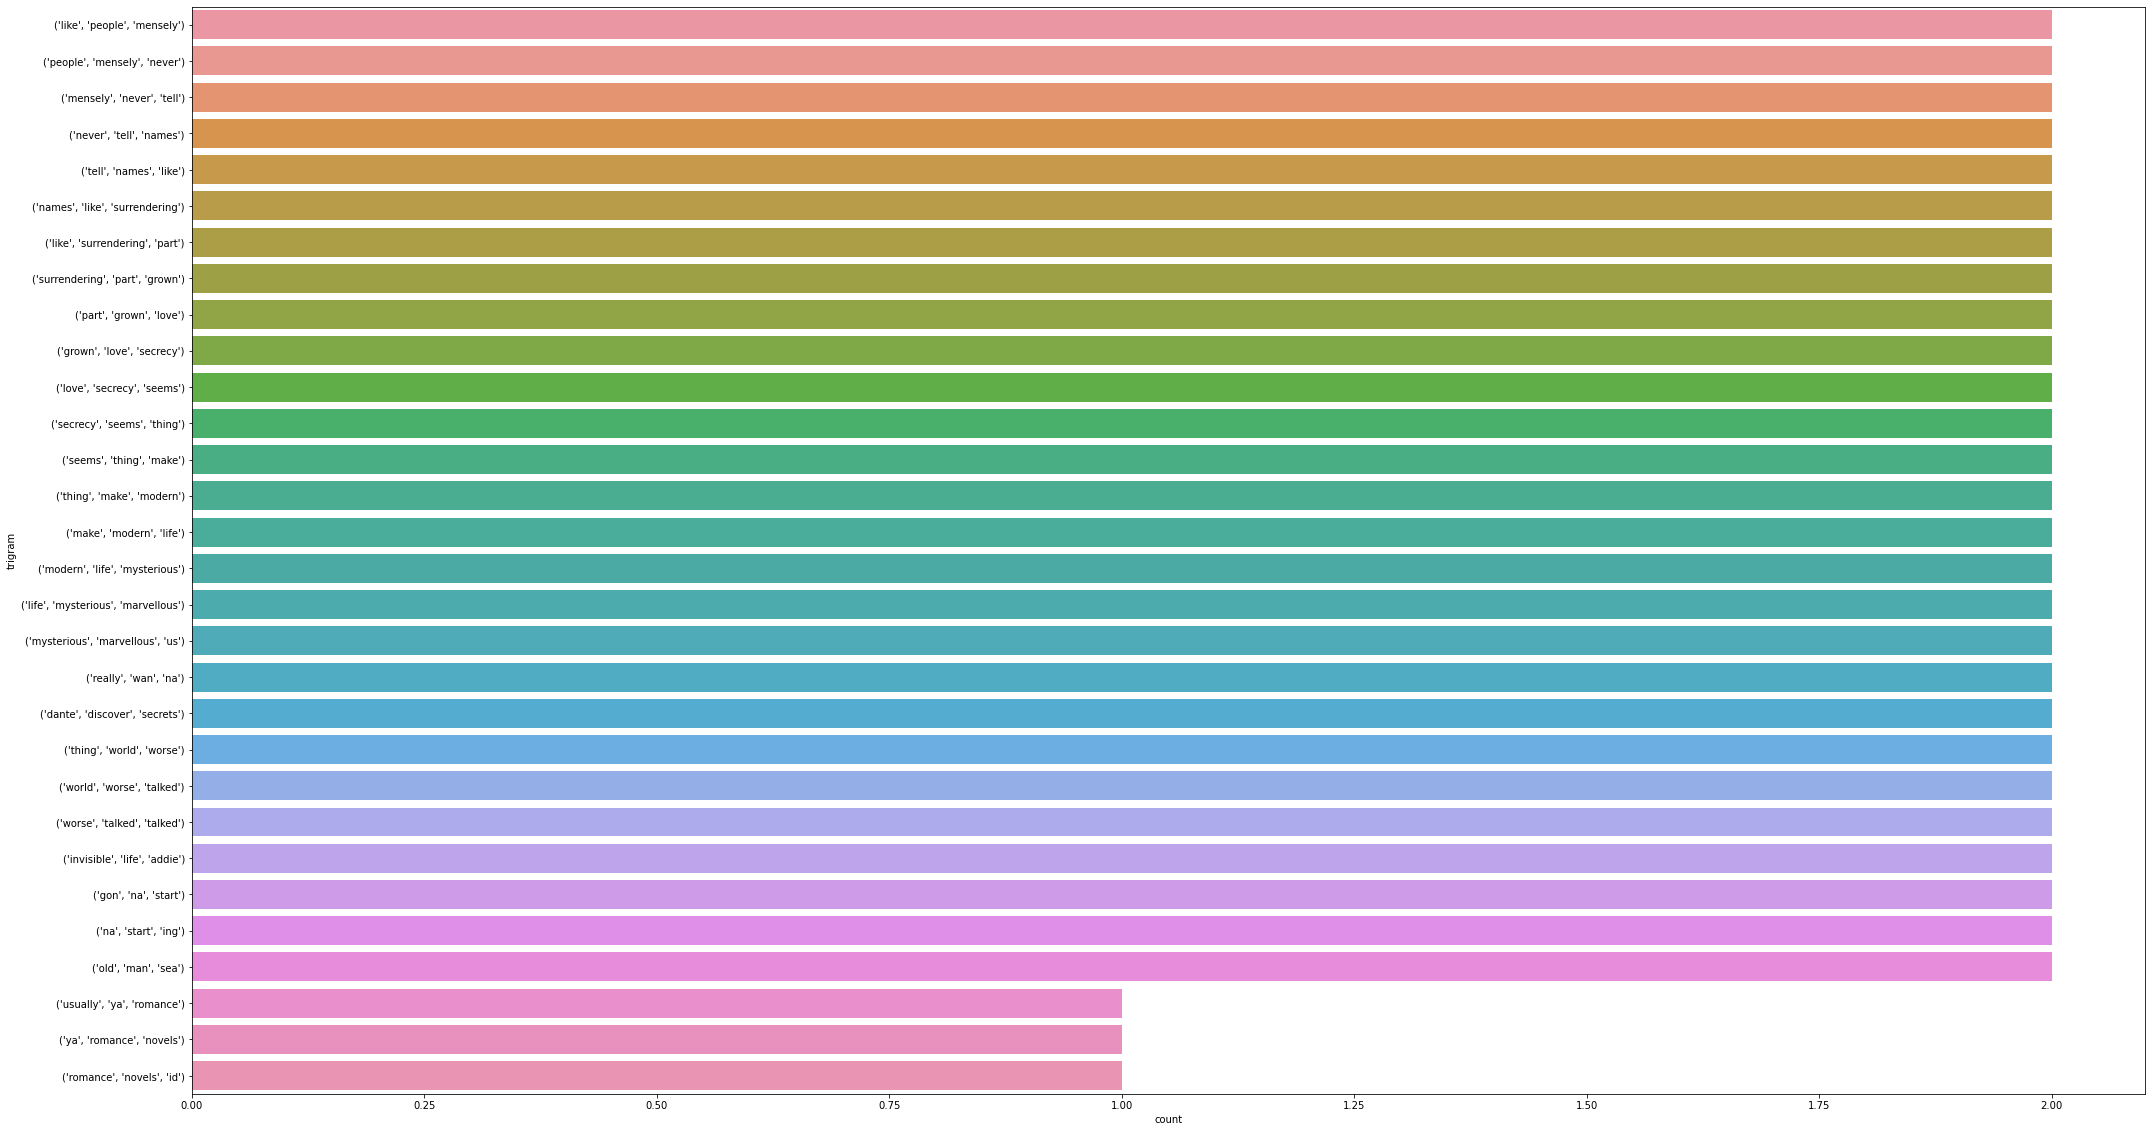

In [10]:
ngrams_books(picture_of_dorian_gray_df, picture_of_dorian_gray_sw)

In [12]:
# function to call on the main
def global_analysis():
    song_of_achilles_sw = ['achilles', 'song', 'read', 'book', 'reading', 'madeline', 'miller', 'im']
    art_of_war_sw = ['art', 'war', 'sun', 'tzu', 'amp', 'book', 'books', 'know', 'enemy', 'read', 'one']
    book_thief_sw = ['book', 'thief', 'markus', 'zusak', 'thiefgt']
    picture_of_dorian_gray_sw = ['dorian', 'gray', 'picture', 'book', 'oscar', 'wilde', 'read', 'reading', 'books','im', 'one']
    
    song_of_achilles_df = word_clouds('the_song_of_achilles.csv', song_of_achilles_sw)
    art_of_war_df = word_clouds('the_art_of_war.csv', art_of_war_sw)
    book_thief_df = word_clouds('the_book_thief.csv', book_thief_sw)
    picture_of_dorian_gray_df = word_clouds('the_picture_of_dorian_gray.csv', picture_of_dorian_gray_sw)
    
    ngrams_books(song_of_achilles_df, song_of_achilles_sw)
    ngrams_books(art_of_war_df, art_of_war_sw)
    ngrams_books(book_thief_df, book_thief_sw)
    ngrams_books(picture_of_dorian_gray_df, picture_of_dorian_gray_sw)
    return